In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 73.3 MB/s eta 0:00:00


In [18]:
import os
import pandas as pd

from gensim.models import Word2Vec, Phrases
from gensim.models.fasttext import FastText
from pyvi import ViTokenizer
from gensim.models.phrases import Phrases, Phraser

In [5]:
pathdata = '/content/drive/MyDrive/Data full/merged_data (2).txt'
stopwords_path = '/content/drive/MyDrive/Data full/stopwords.csv'

model_path = '/content/drive/MyDrive/Data full/fastText_model.model'

In [6]:
# Đọc dữ liệu từ file
train_data = pd.read_csv(pathdata, delimiter='\t', header=None, names=['text'])
train_data['text_tokenized'] = train_data['text'].apply(ViTokenizer.tokenize)
train_data

,text,text_tokenized
0,Việt Nam quốc hiệu là Cộng hòa Xã hội chủ ngh...,Việt_Nam quốc_hiệu là Cộng_hòa Xã_hội chủ_nghĩ...
1,Lãnh thổ Việt Nam xuất hiện con người sinh sốn...,Lãnh_thổ Việt_Nam xuất_hiện con_người sinh_sốn...
2,Đến thời kỳ cận đại Việt Nam lần lượt trải qu...,Đến thời_kỳ cận_đại Việt_Nam lần_lượt trải qua...
3,Sau khi thống nhất Việt Nam tiếp tục gặp khó ...,Sau khi thống_nhất Việt_Nam tiếp_tục gặp khó_k...
4,Tên gọi,Tên gọi
...,...,...
12232,Y học Gerhard Domagk,Y_học Gerhard_Domagk
12233,Văn học Frans Eemil Sillanpää,Văn_học Frans Eemil_Sillanpää
12234,Hòa bình không có giải,Hòa_bình không có giải
12235,Xem thêm,Xem thêm


In [7]:
# Đọc danh sách stopwords
stopwords_data = pd.read_csv(stopwords_path, sep="\t", encoding='utf-8')
stopwords_set = set(stopwords_data['stopwords'])
stopwords_data['stopwords'].head()

0      mà_thôi
1       tuy_có
2      đâu_như
3    quay_bước
4      hỏi_lại
Name: stopwords, dtype: object

In [8]:
# Tiền xử lý dữ liệu
train_data['text_cleaned'] = train_data['text_tokenized'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_set]))
train_data['text_cleaned']

0        Việt_Nam quốc_hiệu Cộng_hòa Xã_hội chủ_nghĩa V...
1        Lãnh_thổ Việt_Nam con_người sinh_sống thời_đại...
2        Đến thời_kỳ cận_đại Việt_Nam lần_lượt trải gia...
3        Sau thống_nhất Việt_Nam sụp_đổ tan_rã đồng_min...
4                                                  Tên gọi
                               ...                        
12232                                 Y_học Gerhard_Domagk
12233                        Văn_học Frans Eemil_Sillanpää
12234                                        Hòa_bình giải
12235                                                  Xem
12236                                            Tham_khảo
Name: text_cleaned, Length: 12237, dtype: object

In [11]:
# Chuyển dữ liệu huấn luyện thành danh sách các từ
sentences = [text.split() for text in train_data['text_cleaned']]

###FastText

In [27]:
# Xây dựng mô hình FastText
model_fasttext = FastText(sentences,
                          vector_size=150,
                          window=10,
                          min_count=10,
                          workers=4,
                          sg=1,
                          negative=5)
model_fasttext.save(model_path)

In [26]:
# Hiển thị từ có độ tương đồng cao nhất
for word, score in model_fasttext.wv.most_similar("Việt_Nam"):
    print(word, score)

Việt 0.9680447578430176
Việt_Nam_Quốc 0.9472370743751526
Nam 0.9435651898384094
Viện 0.9303329586982727
Việt_Minh 0.9170984029769897
Việt_Nam_Cộng_hòa 0.9056028127670288
Chính 0.9035875797271729
nhân_dân 0.9004257917404175
Hồ_Chí_Minh 0.898783266544342
Nhân_dân 0.8955801129341125


In [28]:
# Tính toán khoảng cách giữa hai từ
word1 = "máy_tính"
word2 = "Độc_lập"
distance = model_fasttext.wv.distance(word1, word2)
print(f"Khoảng cách giữa '{word1}' và '{word2}': {distance}")

Khoảng cách giữa 'máy_tính' và 'Độc_lập': 0.33854252099990845


In [29]:
#Trích xuất vectơ word embedding của một từ
word = "máy_tính"
embedding_vector = model_fasttext.wv.get_vector(word)
print(f"Vectơ word embedding của '{word}': {embedding_vector}")

Vectơ word embedding của 'máy_tính': [-0.1740405  -0.06009987 -0.02192822 -0.16513588 -0.09773154 -0.01875537
 -0.03806851  0.02095046 -0.02839523  0.08235946  0.11344611 -0.06378922
  0.01423816  0.09641644 -0.20438355 -0.04053085  0.0741094   0.02094548
  0.08554864  0.07735171 -0.04919352 -0.07326304 -0.13212052  0.27567017
  0.20566796  0.15518032  0.06531251  0.05974705  0.18020877 -0.07993832
  0.00480669  0.04835613  0.03627375  0.12947057 -0.03633606 -0.03227604
  0.13661493 -0.09100186  0.04104925 -0.0802236   0.19221029  0.20251895
  0.01194722 -0.07948003  0.12585615 -0.14547764  0.01445366 -0.04749547
 -0.05114977  0.16675952  0.07083689  0.15129097 -0.09241825  0.01369429
  0.24420518 -0.16162233  0.11120551  0.05824175  0.04871905  0.15471175
 -0.11039356 -0.00681593  0.2408816   0.05903263  0.03130471  0.02192311
 -0.05987479 -0.2284558  -0.00262379 -0.14064908  0.11453094  0.01422222
  0.0142711  -0.28701612  0.08140999  0.05073105  0.14818688  0.00147742
 -0.09670067 -

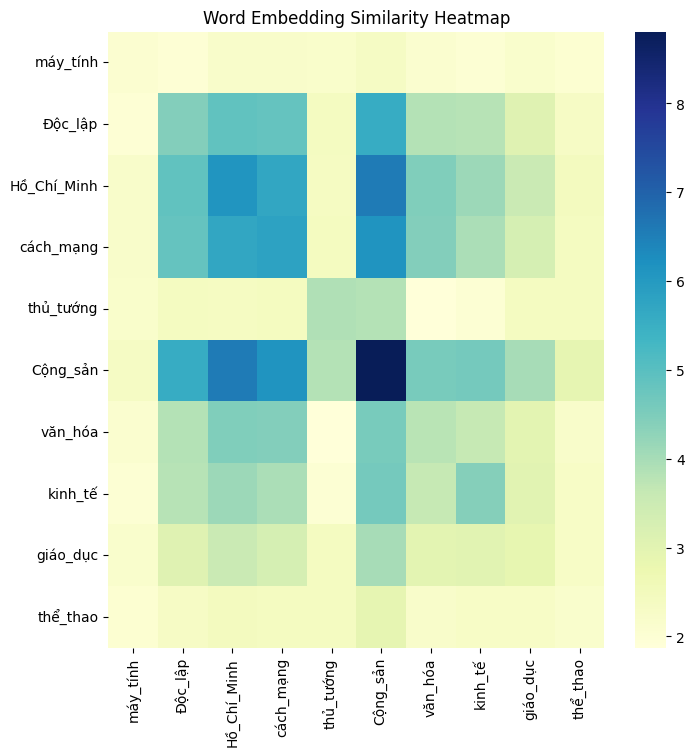

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chọn 10 từ để phân tích
selected_words = ["máy_tính", "Độc_lập", "Hồ_Chí_Minh", "cách_mạng", "thủ_tướng", "Cộng_sản", "văn_hóa", "kinh_tế", "giáo_dục", "thể_thao"]

# Lấy word vectors tương ứng với các từ
word_vectors = model_fasttext.wv[selected_words]

# Tính ma trận tương đồng cosine giữa các từ
similarity_matrix = word_vectors @ word_vectors.T

# Trực quan hóa ma trận tương đồng cosine bằng heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(similarity_matrix, xticklabels=selected_words, yticklabels=selected_words, cmap="YlGnBu")

plt.title("Word Embedding Similarity Heatmap")
plt.show()

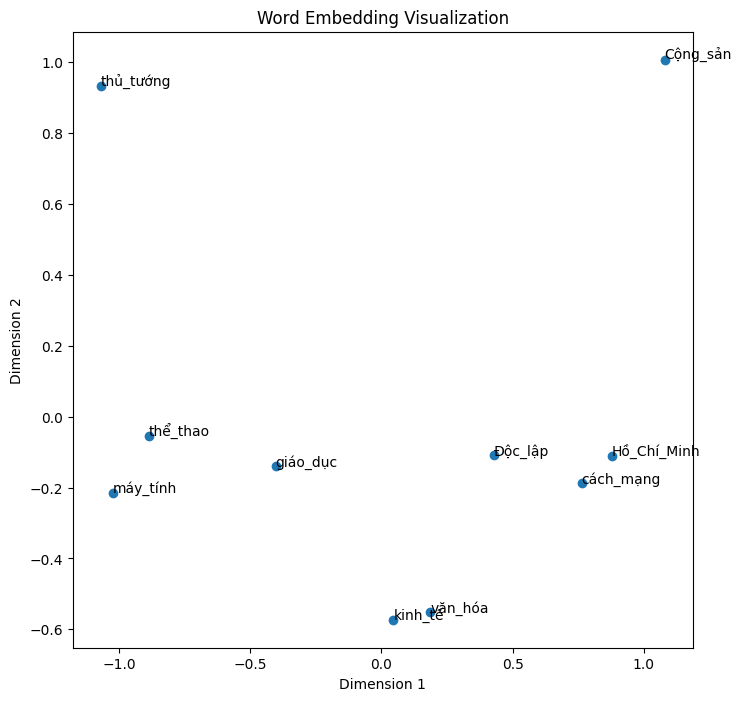

In [33]:
from sklearn.decomposition import PCA

# Chọn 10 từ để phân tích
selected_words = ["máy_tính", "Độc_lập", "Hồ_Chí_Minh", "cách_mạng", "thủ_tướng", "Cộng_sản", "văn_hóa", "kinh_tế", "giáo_dục", "thể_thao"]

# Lấy word vectors tương ứng với các từ
word_vectors = model_fasttext.wv[selected_words]

# Giảm chiều dữ liệu từ vector 150 chiều xuống còn 2 chiều
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Tạo đồ thị trực quan hóa
plt.figure(figsize=(8, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o')

# Hiển thị từng từ lên đồ thị
for i, word in enumerate(selected_words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Word Embedding Visualization")
plt.show()